In [ ]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [34]:
USREC=pd.read_csv('../data/USRECD.csv')

In [36]:
USREC.head()

,DATE,USRECD
0,1999-12-01,0
1,1999-12-02,0
2,1999-12-03,0
3,1999-12-04,0
4,1999-12-05,0


In [2]:
data=pd.read_csv("../../data/data/dj30/dj30.csv",index_col=0)

In [3]:
data.head(5)

,date,open,high,low,close,adjcp,tic,zopen,zhigh,zlow,zadjcp,zclose,zd_5,zd_10,zd_15,zd_20,zd_25,zd_30
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575916,AAPL,-0.004450,0.003088,-0.005423,-0.143726,0.005374,-0.010348,-0.011415,0.002751,-0.061124,-0.072128,-0.126481
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643501,AAPL,-0.008320,0.002999,-0.010062,-0.143726,0.005374,-0.010348,-0.011415,0.002751,-0.061124,-0.072128,-0.126481
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783867,AAPL,-0.007368,0.001244,-0.012822,-0.143726,0.011102,-0.010348,-0.011415,0.002751,-0.061124,-0.072128,-0.126481
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917509,AAPL,-0.006226,0.000829,-0.007528,-0.143726,0.010454,-0.010348,-0.011415,0.002751,-0.061124,-0.072128,-0.126481
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897021,AAPL,0.008939,0.014275,-0.000901,-0.143726,-0.001586,-0.010348,-0.011415,0.002751,-0.061124,-0.072128,-0.126481


In [4]:
data=data.loc[:,['date','adjcp']]
data['adjcp']=data['adjcp'].astype(float)
data=data.set_index('date')

In [5]:
data.head(5)
type(data)

pandas.core.frame.DataFrame

In [6]:
data=data.pct_change().dropna()

In [7]:
data.head(5)
display(data.shape)
cutoff=1000

(72992, 1)

In [19]:
marvok_regression=sm.tsa.MarkovAutoregression(data[:cutoff ],k_regimes=2, order=4,switching_ar=False)
res=marvok_regression.fit()

C:\Users\AIR-USER14\anaconda3\envs\markov_regime_switching\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plot

(996, 2)

count    9.960000e+02
mean     1.000000e+00
std      3.631110e-14
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                    adjcp   No. Observations:                  996
Model:             MarkovAutoregression   Log Likelihood                2653.124
Date:                  Sun, 13 Nov 2022   AIC                          -5288.249
Time:                          21:34:54   BIC                          -5244.115
Sample:                               0   HQIC                         -5271.472
                                  - 996                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.025      0.032      0.974      -0.048       0.050
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.025      0.032      0.974      -0.048       0.050
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   1.27e-05     22.316      0.000       0.000       0.000
ar.L1          0.0146      0.032      0.460      0.646      -0.048       0.077
ar.L2         -0.0304      0.032     -0.961      0.337      -0.093       0.032
ar.L3         -0.0135      0.032     -0.425      0.671      -0.076       0.049
ar.L4          0.0288      0.032      0.909      0.363      -0.033       0.091
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.4998   1.14e-07   4.37e+06      0.000       0.500       0.500
p[1->0]        0.4998   1.16e-07   4.31e+06      0.000       0.500       0.500
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 7.02e+21. Standard errors may be unstable.
"""

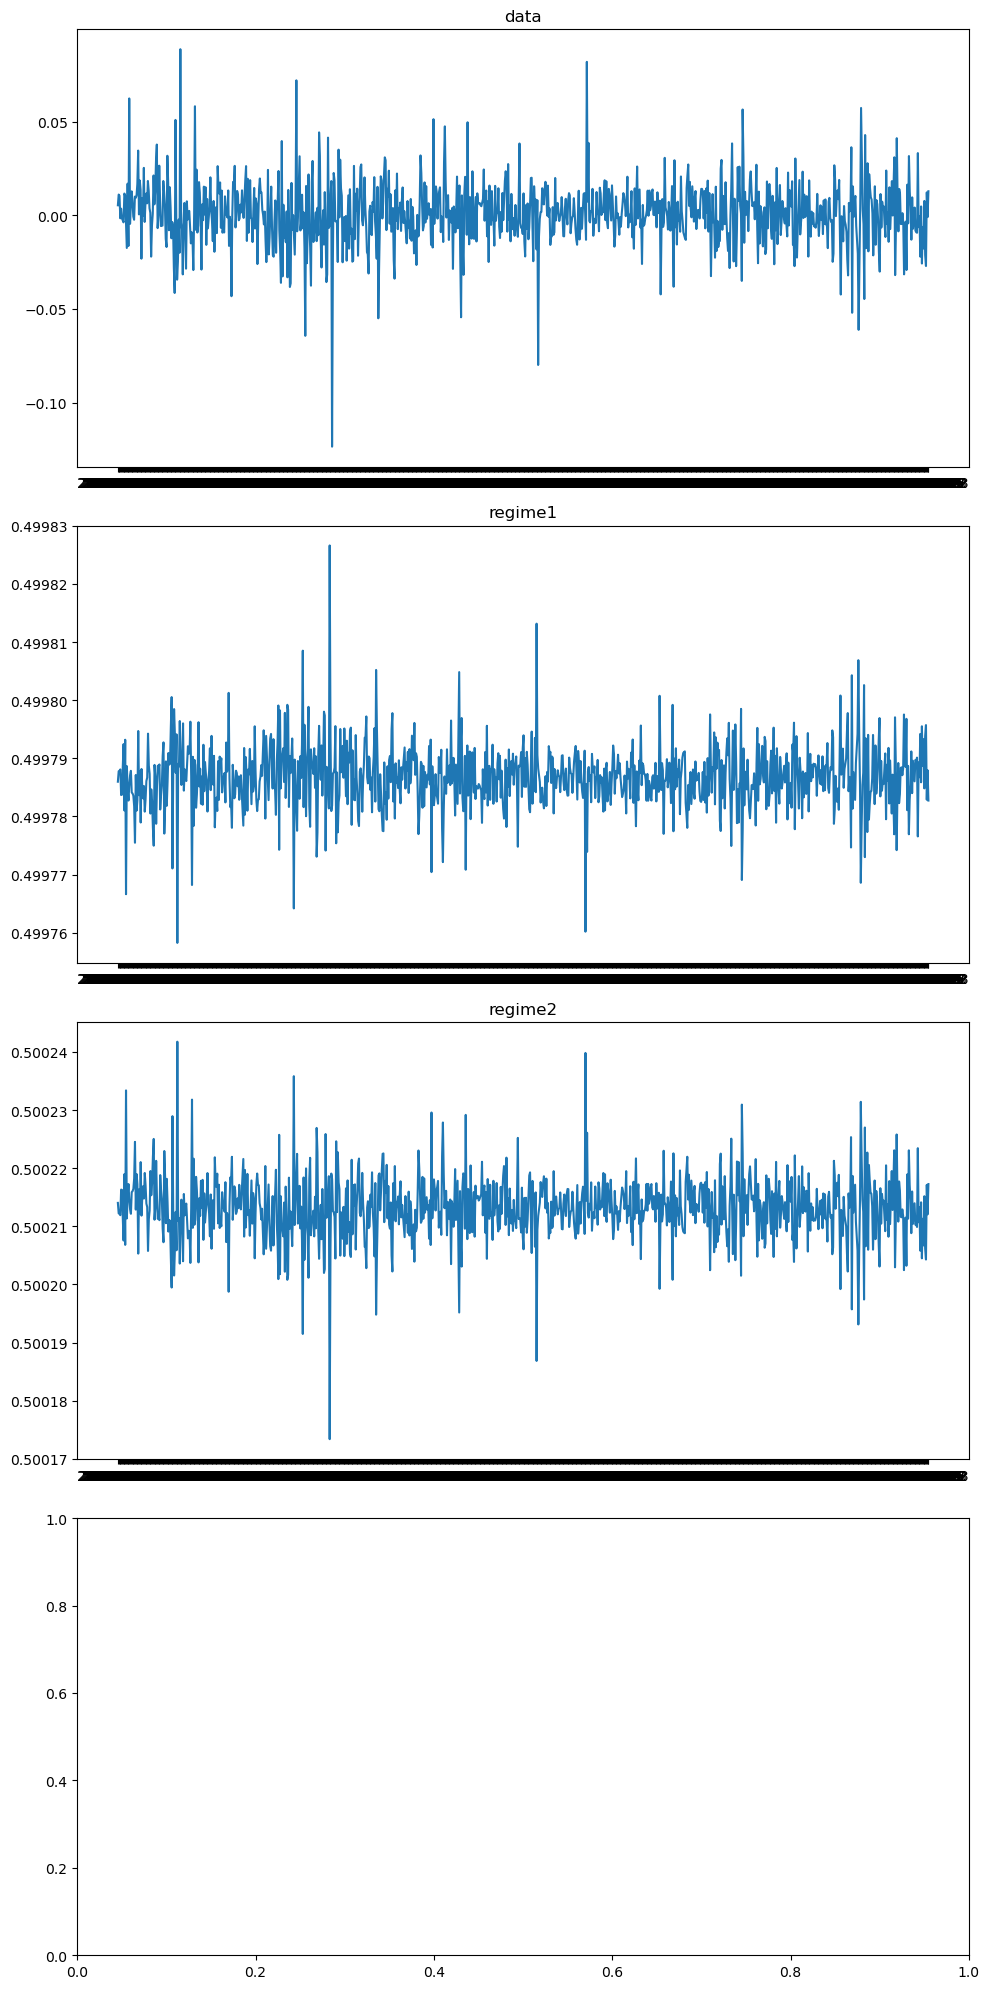

In [28]:
fig, ax = plt.subplots(4, 1,figsize=(10,20))
ax[0].plot(data[:cutoff])
ax[0].set_title('data')
display(res.smoothed_marginal_probabilities.shape)
ax[1].plot(res.smoothed_marginal_probabilities[0])
ax[1].set_title('regime1')

ax[2].plot(res.smoothed_marginal_probabilities[1])
ax[2].set_title('regime2')


# ax[3].plot(res.smoothed_marginal_probabilities[2])
# ax[3].set_title('regime3')
sum=res.smoothed_marginal_probabilities[0]+res.smoothed_marginal_probabilities[1]
display(sum.describe())
plt.tight_layout()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                    adjcp   No. Observations:                  996
Model:             MarkovAutoregression   Log Likelihood                2653.124
Date:                  Sun, 13 Nov 2022   AIC                          -5288.249
Time:                          21:34:40   BIC                          -5244.115
Sample:                               0   HQIC                         -5271.472
                                  - 996                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.025      0.032      0.974      -0.048       0.050
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.025      0.032      0.974      -0.048       0.050
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   1.27e-05     22.316      0.000       0.000       0.000
ar.L1          0.0146      0.032      0.460      0.646      -0.048       0.077
ar.L2         -0.0304      0.032     -0.961      0.337      -0.093       0.032
ar.L3         -0.0135      0.032     -0.425      0.671      -0.076       0.049
ar.L4          0.0288      0.032      0.909      0.363      -0.033       0.091
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.4998   1.14e-07   4.37e+06      0.000       0.500       0.500
p[1->0]        0.4998   1.16e-07   4.31e+06      0.000       0.500       0.500
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 7.02e+21. Standard errors may be unstable.
"""